# Body Fat Prediction

## Data Preparation

**Context**

Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.


https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/Drive/MyDrive/dibimbing/Portfolio/Data/bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


The variables listed below, from left to right, are:
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

## Data Cleaning

### Missing Value

In [4]:
df.isna().count()

Density    252
BodyFat    252
Age        252
Weight     252
Height     252
Neck       252
Chest      252
Abdomen    252
Hip        252
Thigh      252
Knee       252
Ankle      252
Biceps     252
Forearm    252
Wrist      252
dtype: int64

Clean!

### Duplicated Value

In [5]:
df.duplicated().sum()

0

Clean!

## Data Understanding

### Statistical Summary

In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


Based on the data description, by looking at:
1. Min and max value, for all the columns seemed reasonable, except 0 bodyfat, so remove the row
2. Mean dan median (50%) value, the distribution of all variable has roughly symmetrical distribution

In [7]:
df[df['BodyFat'] == 0]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
181,1.1089,0.0,40,118.5,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [8]:
df.drop(df[df['BodyFat']==0].index)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Univariate Analysis

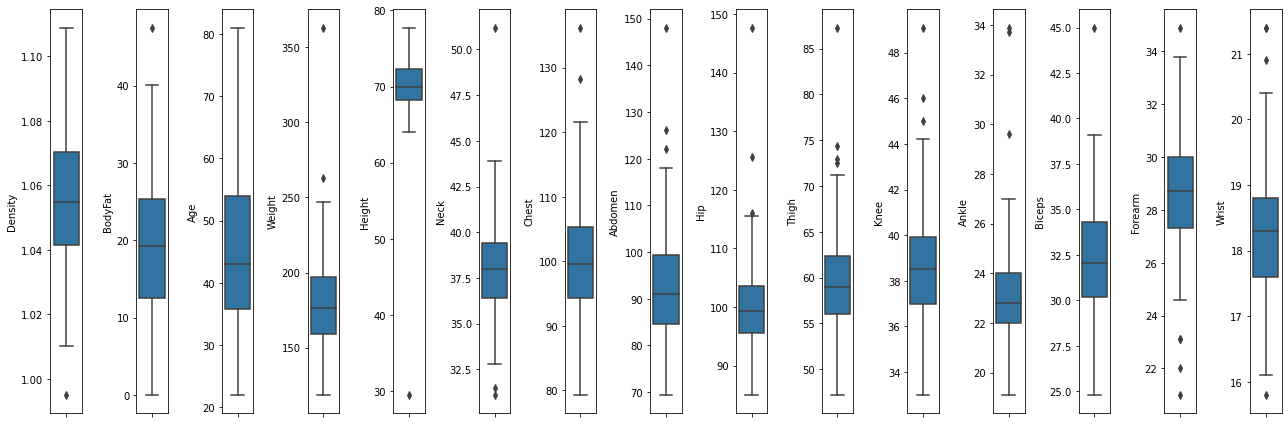

In [9]:
numerical = df.columns
plt.figure(figsize=(18,6))
for i in range(0, len(numerical)):
  plt.subplot(1, len(numerical), i+1)
  sns.boxplot(y = df[numerical[i]])
  plt.tight_layout();


There's several outlier not reasonable, that NO GOOD for Regression model, so remove outlier

In [10]:
for i in numerical:
  outlier = 0
  q75,q25 = np.percentile(df[i],[75,25])
  intr_qr = q75-q25
 
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
 
  for j in range(0, df.shape[0]):
    if df[i][j] < min or df[i][j] > max:
      df[i][j] = np.nan
      outlier = outlier + 1
    else:
      pass
  print('Outlier', i, ":", outlier)

Outlier Density : 1
Outlier BodyFat : 1
Outlier Age : 0
Outlier Weight : 2
Outlier Height : 1
Outlier Neck : 3
Outlier Chest : 2
Outlier Abdomen : 3
Outlier Hip : 3
Outlier Thigh : 4
Outlier Knee : 3
Outlier Ankle : 3
Outlier Biceps : 1
Outlier Forearm : 5
Outlier Wrist : 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
df = df.dropna().copy()

In [12]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Check again the outlier

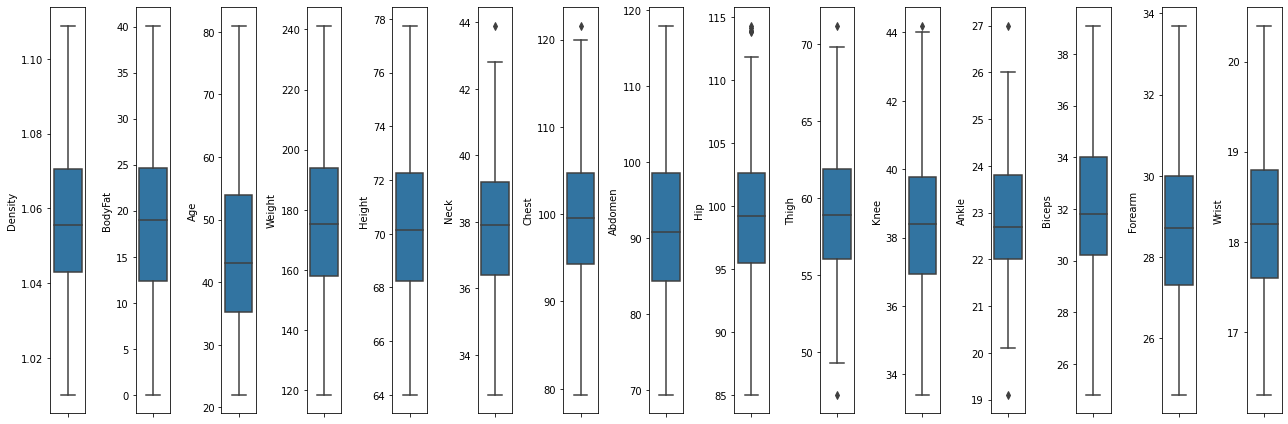

In [13]:
numerical = df.columns
plt.figure(figsize=(18,6))
for i in range(0, len(numerical)):
  plt.subplot(1, len(numerical), i+1)
  sns.boxplot(y = df[numerical[i]])
  plt.tight_layout();

Still have outlier but it is reasonable

### Multivariate Alaysis

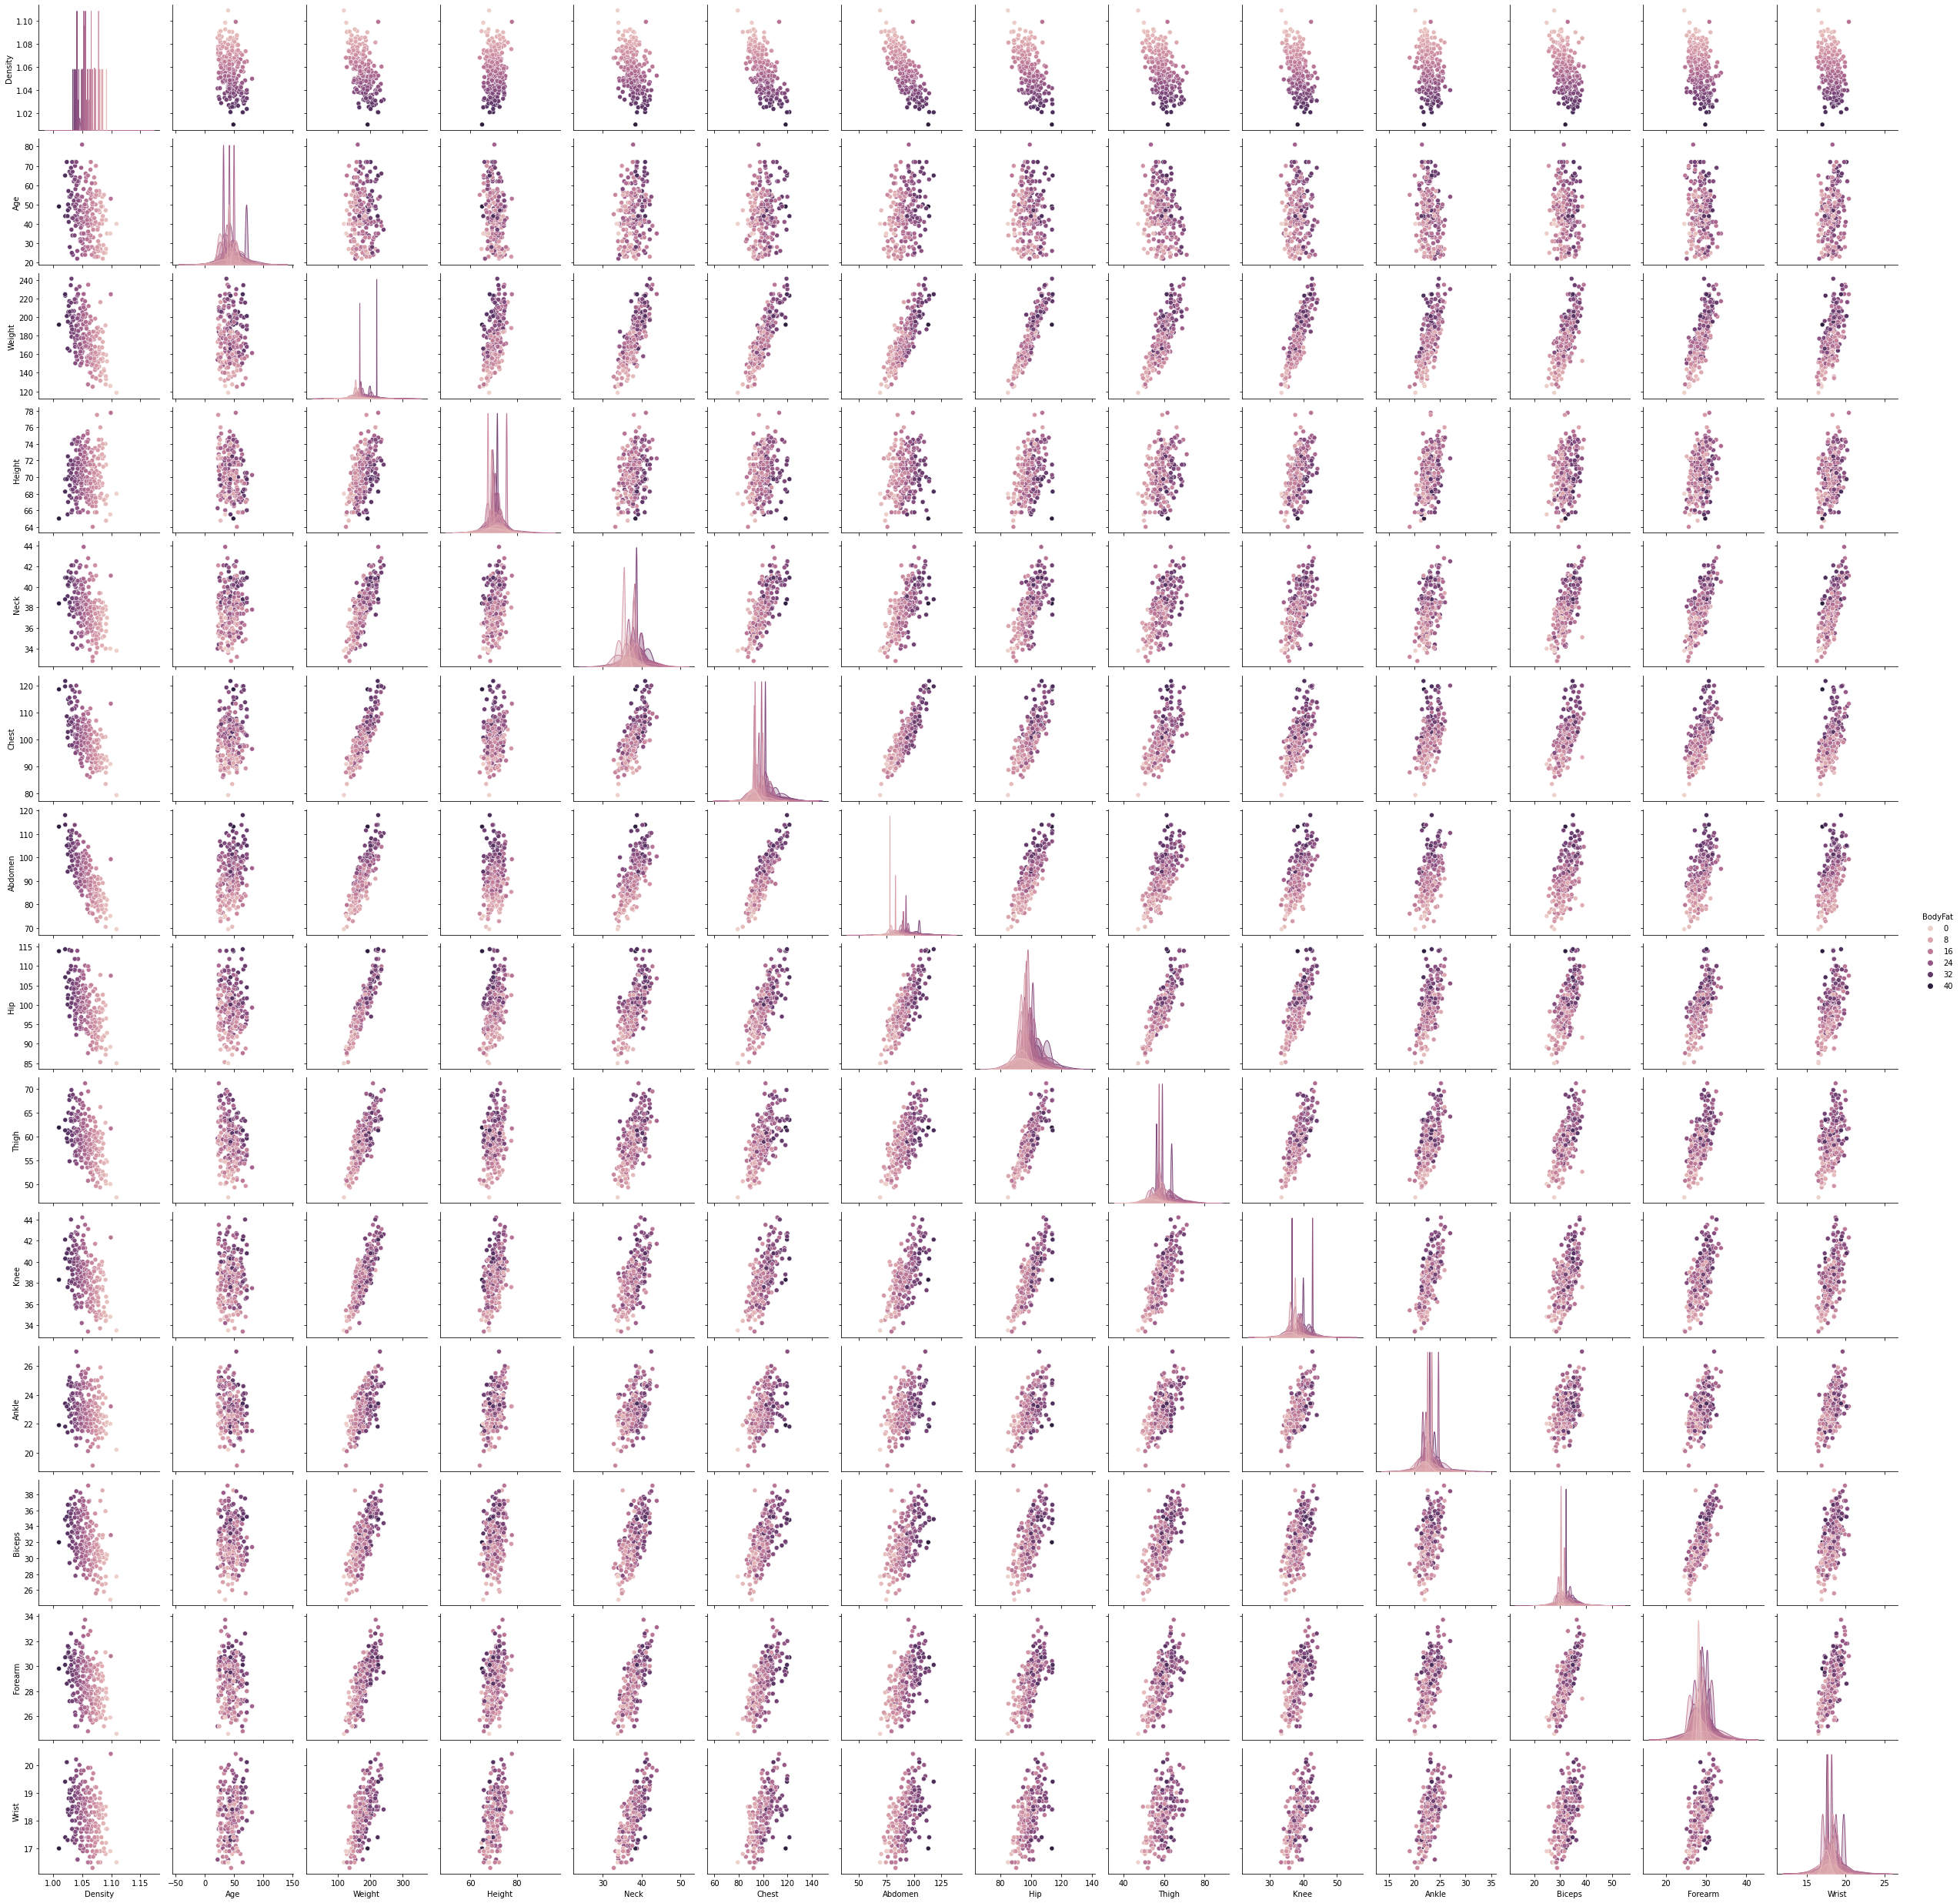

In [14]:
sns.pairplot(df, hue='BodyFat')

From the chart above, it can be concluded that:
1. By seeing scatter plot, there are several variable that have correlation
* Positif: All variable except Age and Height
* Negative: -
* No: Age and all variable, Height and all variable
2. By seeing the dispertion of the color in scatter plot it can be concluded that:
* Scatter Plot with neat distribution of color gradations is have correlation with body fat


## Preliminary Frow

### Data Splitting

Split data:
1. Training dataset: 80% of 80% = 64%
2. Validation dataset: 20% of 80% = 16%
3. Test dataset: 20%

In [15]:
x = df.drop(columns=['BodyFat', 'Density'])
y = df['BodyFat'].copy()

# First splitting: pretrain and test
x_pretrain, x_test, y_pretrain, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Second splitting: train and validation
x_train, x_val, y_train, y_val = train_test_split(x_pretrain, y_pretrain, test_size=0.2, random_state=42)

## Multicollinearity Check

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(x_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df = vif_df.sort_values('vif_score', ascending=False)
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
2,Weight,33.662857
7,Hip,11.505062
5,Chest,8.619658
6,Abdomen,8.604235
8,Thigh,6.400171
12,Forearm,5.851491
9,Knee,4.472461
4,Neck,4.215540
13,Wrist,3.824557
11,Biceps,3.766828


Variable with high VIF score
1. Weight
2. Hip
3. Chest
4. Abdomen
5. Thigh
6. Forearm
7. Knee
8. Neck

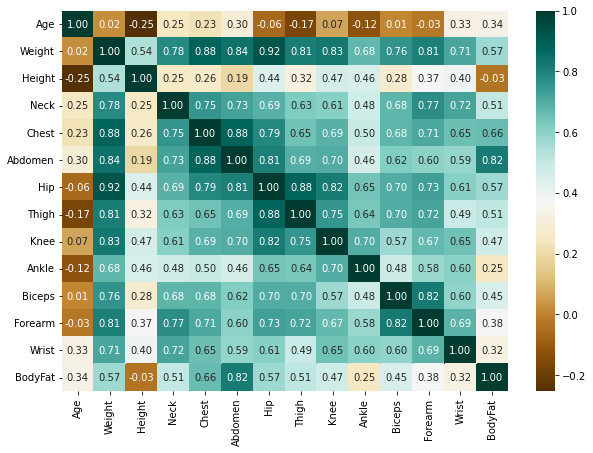

In [17]:
df_train = pd.concat([x_train, y_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG')
plt.show()

Variable with high VIF score and correlation:
1. Weight and Hip, drop Weight
2. Abdomen and Chest, drop Chest
3. Thigh and Hip, drop Thigh
4. Neck and Weight, Chest, drop Neck
5. Forearm and Biceps, drop Forearm

In [18]:
x_train = x_train.drop(columns=['Weight', 'Chest', 'Thigh', 'Neck', 'Forearm'])
x_val = x_val.drop(columns=['Weight', 'Chest', 'Thigh', 'Neck', 'Forearm'])
x_test = x_test.drop(columns=['Weight', 'Chest', 'Thigh', 'Neck', 'Forearm'])

Check multicollinearity again

In [19]:
X = add_constant(x_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df = vif_df.sort_values('vif_score', ascending=False)
print(vif_df)

   feature  vif_score
4      Hip   7.227155
3  Abdomen   4.724904
5     Knee   4.021841
8    Wrist   3.112364
6    Ankle   2.503965
7   Biceps   2.284430
1      Age   2.229487
2   Height   1.641423


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


There are several variable still have high VIF Score:
1. Abdomen, 
2. Hip, 
3. Knee

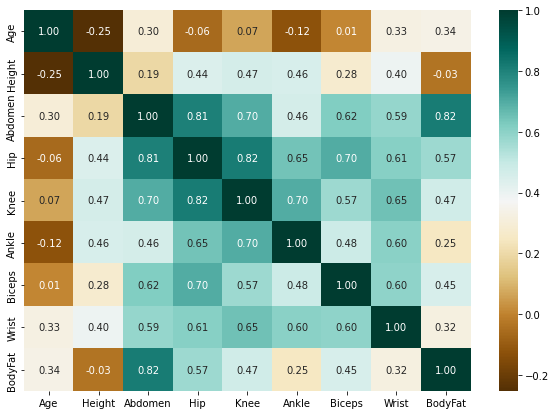

In [20]:
df_train = pd.concat([x_train, y_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG')
plt.show()

Abdomen and Hip, drop Hip

Knee and Hip, drop Hip

In [21]:
x_train = x_train.drop(columns=['Hip'])
x_val = x_val.drop(columns=['Hip'])
x_test = x_test.drop(columns=['Hip'])

In [22]:
X = add_constant(x_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df = vif_df.sort_values('vif_score', ascending=False)
print(vif_df)

   feature  vif_score
4     Knee   3.398041
7    Wrist   3.088388
3  Abdomen   2.764685
5    Ankle   2.495653
6   Biceps   2.139687
1      Age   1.840124
2   Height   1.606584


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


All clear from high multicollinearity (< 4)

## Model Fitting

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
feature = x_train.copy()
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

simple_reg.fit(x_train, y_train)

LinearRegression()

In [24]:
model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,0.417640
1,Age,0.077377
2,Height,-0.305840
3,Abdomen,0.783182
4,Knee,-0.020332
5,Ankle,0.110061
6,Biceps,0.178579
7,Wrist,-2.364246


### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

lambdas = [0.01, 0.1, 1, 10]
ridge_reg = []
# 4 models with 4 different alphas (lambda)
for i in lambdas:
  ridge_model = Ridge(alpha=i, random_state=42)
  ridge_reg.append(ridge_model.fit(x_train, y_train))

In [26]:
from sklearn.metrics import mean_squared_error

for model, alpha in zip(ridge_reg, lambdas):
    y_predict_val = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_predict_val))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.875413109051554
RMSE of Ridge regression model with alpha = 0.1 is 4.8754483251435925
RMSE of Ridge regression model with alpha = 1 is 4.875968940176124
RMSE of Ridge regression model with alpha = 10 is 4.8906606348347434


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
ridge_best = ridge_reg[0]

ridge_coef_df = pd.DataFrame({
    'feature':['intercept'] + feature.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

ridge_coef_df

,feature,coefficient
0,intercept,0.416068
1,Age,0.077358
2,Height,-0.305882
3,Abdomen,0.783182
4,Knee,-0.020359
5,Ankle,0.109890
6,Biceps,0.178516
7,Wrist,-2.363567


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = []
# 4 models with 4 different alphas (lambda)
for i in lambdas:
  lasso_model = Lasso(alpha=i, random_state=42)
  lasso_reg.append(lasso_model.fit(x_train, y_train))

# fit the model (training)

In [29]:
for model, alpha in zip(lasso_reg, lambdas):
    y_predict_val = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_predict_val))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.876188676423324
RMSE of Ridge regression model with alpha = 0.1 is 4.87846922107571
RMSE of Ridge regression model with alpha = 1 is 5.1079319925579645
RMSE of Ridge regression model with alpha = 10 is 5.133616619032688


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [30]:
lasso_best = lasso_reg[0]

lasso_coef_df = pd.DataFrame({
    'feature':['intercept'] + feature.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

lasso_coef_df

,feature,coefficient
0,intercept,0.277490
1,Age,0.075714
2,Height,-0.307772
3,Abdomen,0.782636
4,Knee,-0.009956
5,Ankle,0.077532
6,Biceps,0.172181
7,Wrist,-2.311919


## Model Evaluation

### Linear Regression

#### Training Error

In [31]:
y_predict_train = simple_reg.predict(x_train)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.080615978446983
MAE for training data is 3.379668394468736
MAPE for training data is 137438119583484.75


#### Testing Error

In [33]:
# prepare prediction result on test data
y_predict_test = simple_reg.predict(x_test)

# ground truth target
y_test = y_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 4.3362567424604315
MAE for testing data is 3.621962503019359
MAPE for testing data is 0.26654872591495543


### Ridge Regression

#### Training Error

In [35]:
y_predict_train = ridge_best.predict(x_train)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.080615991811063
MAE for training data is 3.379641337133167
MAPE for training data is 137436149951439.0


#### Testing Error

In [37]:
# prepare prediction result on test data
y_predict_test = ridge_best.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [38]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 4.336184653830221
MAE for testing data is 3.6219099390474243
MAPE for testing data is 0.2665471318265892


### Lasso Regression

#### Training Error

In [39]:
y_predict_train = lasso_best.predict(x_train)

In [40]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.080740710685152
MAE for training data is 3.377295288416507
MAPE for training data is 137462666807170.77


#### Testing Error

In [41]:
# prepare prediction result on test data
y_predict_test = lasso_best.predict(x_test)

# ground truth target

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [42]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 4.330472589224868
MAE for testing data is 3.618603945361913
MAPE for testing data is 0.2664098516813871
